In [1]:
a = 3
a

3

In [4]:
import numpy as np

In [5]:
#C: \Users\oknuy\OneDrive\Documents\National University\ANA 500 Sep 29
url = r"/Users/oknuy/OneDrive/Documents/National University/ANA 500 Sep 20/adult_income.csv"

In [8]:
import pandas as pd

In [13]:
#C: \Users\oknuy\OneDrive\Documents\National University\ANA 500 Sep 29
url = r"/Users/oknuy/OneDrive/Documents/National University/ANA 500 Sep 29/adult_income.csv"

In [14]:
df = pd.read_csv(url)

In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
# Filter for high income
high_income = df[df['income'] == '>50K']

# Calculate the proportion of high-income earners per education level
income_ratio = (
    high_income['education'].value_counts()
    .div(df['education'].value_counts())
    .sort_values(ascending=False)
)

# Display the education level with the highest proportion of high-income earners
top_education = income_ratio.idxmax()
top_ratio = income_ratio.max()

print(f"The education level with the highest proportion of high-income earners is: {top_education} ({top_ratio:.2%})")

The education level with the highest proportion of high-income earners is: Doctorate (74.09%)


In [17]:
import matplotlib as mpl

In [18]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np

In [26]:
import seaborn as sns

In [33]:
from jupyter_dash import JupyterDash
import dash
from dash import html, dcc
import plotly.express as px
import pandas as pd


In [35]:
import plotly.express as px

In [37]:
import plotly.graph_objects as go

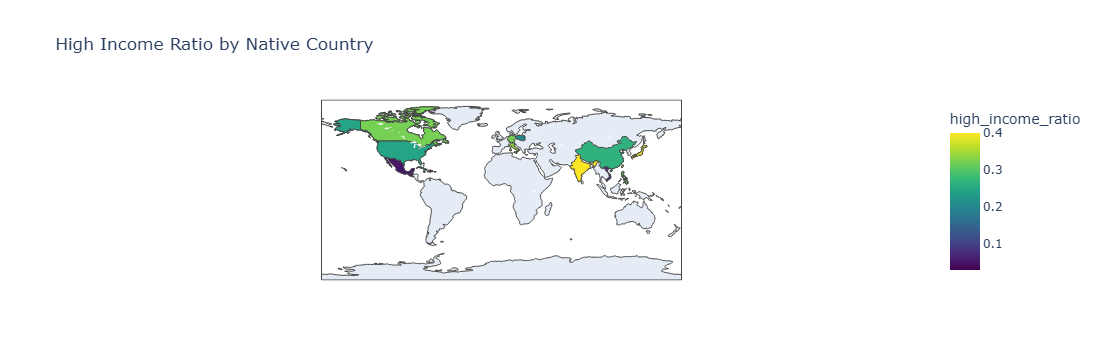

In [44]:
import pandas as pd
import plotly.express as px

# Load and clean data
df = pd.read_csv(url)
country_income = df.groupby(['native-country', 'income']).size().unstack(fill_value=0)
country_income['high_income_ratio'] = country_income['>50K'] / (country_income['>50K'] + country_income['<=50K'])

# Filter for countries with enough data
filtered = country_income[country_income.sum(axis=1) > 50].reset_index()

# Plot
fig = px.choropleth(
    filtered,
    locations='native-country',
    locationmode='country names',
    color='high_income_ratio',
    color_continuous_scale='Viridis',
    title='High Income Ratio by Native Country'
)
fig.show()

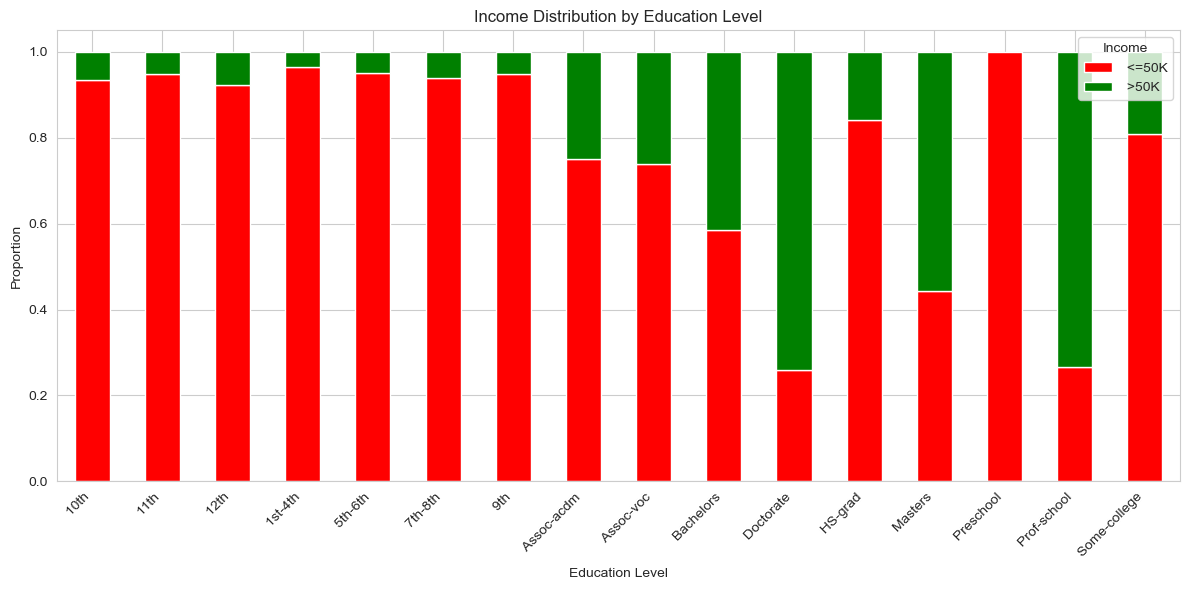

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=columns, na_values=' ?')

# Clean data
df.dropna(subset=['education', 'income'], inplace=True)

# Prepare data
edu_income = df.groupby(['education', 'income']).size().unstack().fillna(0)
edu_income_percent = edu_income.div(edu_income.sum(axis=1), axis=0)

# Plot
edu_income_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=['red', 'green']  # <=50K = red, >50K = green
)

plt.title('Income Distribution by Education Level')
plt.ylabel('Proportion')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
plt.show()


In [80]:
df['income'] = df['income'].astype(str).str.strip()
print(df['income'].unique())  # Optional: confirm values are clean


['<=50K' '>50K']


In [81]:
palette = {'<=50K': 'red', '>50K': 'green'}


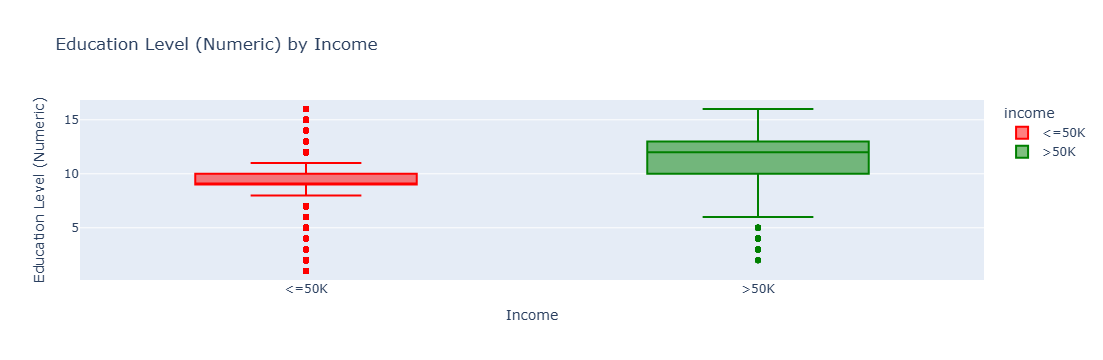

In [84]:
import pandas as pd
import plotly.express as px

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, names=columns, na_values=' ?')

# Clean data
df.dropna(subset=['education', 'income', 'education-num'], inplace=True)
df['income'] = df['income'].astype(str).str.strip()

# Create box plot
fig = px.box(
    df,
    x='income',
    y='education-num',
    title='Education Level (Numeric) by Income',
    color='income',
    color_discrete_map={'<=50K': 'red', '>50K': 'green'}
)

fig.update_layout(xaxis_title='Income', yaxis_title='Education Level (Numeric)')
fig.show()


In [95]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
df = pd.read_csv(url, header=None, names=column_names)

# Clean whitespace
df['education'] = df['education'].str.strip()
df['income'] = df['income'].str.strip()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H3("Income Distribution by Education Level"),
    dcc.Dropdown(
        id='education-dropdown',
        options=[{'label': edu, 'value': edu} for edu in sorted(df['education'].unique())],
        value='Bachelors'
    ),
    dcc.Graph(id='income-pie')
])

@app.callback(
    dash.dependencies.Output('income-pie', 'figure'),
    [dash.dependencies.Input('education-dropdown', 'value')]
)
def update_chart(selected_education):
    filtered_df = df[df['education'] == selected_education]
    fig = px.pie(
        filtered_df,
        names='income',
        title=f'Income for {selected_education}',
        color='income',
        color_discrete_map={
            '>50K': 'green',
            '<=50K': 'lightgray'
        }
    )
    return fig

if __name__ == '__main__':
    app.run(debug=True)
